## Outline

1. Generate data that is not linearly separable
2. Train with Sigmoid Neuron and see the performance
3. Write from scratch the first feed forward neural network
4. Train the FF network on the data and compare with SN
5. Write a generic class for a FF network
6. Train generic class on binary classification
7. Generate data for muilti-class classification
8. Train a FF network for 7
9. use softmax function for predicting probability distribution and cross-entropy loss function
10. Train with 8 for multi-class classification
11. Exercise on other dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green"])
import warnings
warnings.filterwarnings('ignore')

## Class for Sigmoid neuron

In [0]:
class SigmoidNeuron:
  
  # initialize the parameters
  def __inti__(self):
    self.w = None
    self.b = None
    self.wts = None
   
  # model function
  def sigmoid_perceptron(self,x):
    v = np.dot(x,self.w)+self.b
    return 1/(1+np.exp(-v))
  
  # gradient function and learning algorithm
  
  # 1. grad for the weights
  def grad_w(self,x,y):
    f_x = self.sigmoid_perceptron(x)
    return (f_x-y)*f_x*(1-f_x)*x

  # 2. grad for the bias term
  def grad_b(self,x,y):
    f_x = self.sigmoid_perceptron(x)
    return (f_x-y)*f_x*(1-f_x)
  
  # learning algorithm
  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=False):    
    self.w = np.random.randn(X.shape[1],1)
    self.b = 0
    
    wts = []
    bs = []
    
    if display_loss:
      loss = {}
    
    
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):      
      dw,db = 0,0
   
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      
      
      self.w -= learning_rate*dw.reshape(X.shape[1],1)
      self.b -= learning_rate*db
      
      wts.append(np.copy(self.w))
      bs.append(np.copy(self.b))
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred,Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
    return wts,bs
  
  def predict(self,X):
    y_pred = []
    for x in X:
      y_pred.append(self.sigmoid_perceptron(x))
    return np.array(y_pred)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

## Generating the data

In [2]:
data,labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


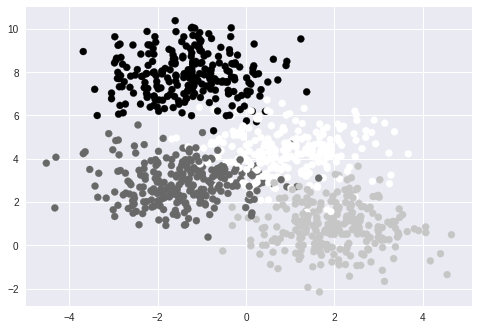

In [7]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

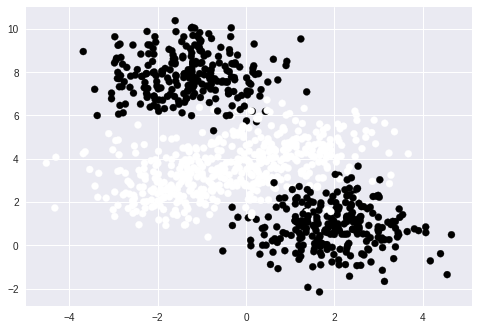

In [9]:
# make the problem binary classification 
labels_orig = labels
labels = np.mod(labels_orig,2)
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(750, 2) (250, 2) (750,) (250,)


## SN classification

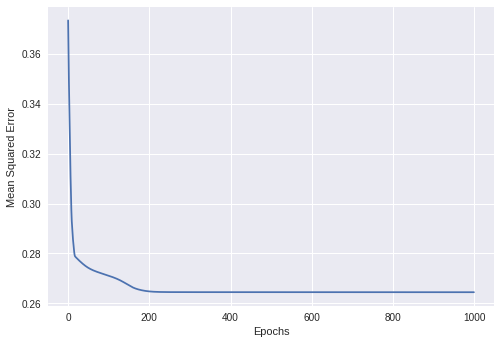

In [0]:
sn = SigmoidNeuron()
wts,bs = sn.fit(X_train,Y_train,epochs=1000,learning_rate=0.1,display_loss=True)

## Evaluation of sigmoid neuron

In [0]:
Y_pred_train = sn.predict(X_train)
Y_pred_train_binarised = (Y_pred_train >= 0.5).astype(int).ravel()
Y_pred_test = sn.predict(X_test)
Y_pred_test_binarised = (Y_pred_test >= 0.5).astype(int).ravel()

accuracy_train = accuracy_score(Y_pred_train_binarised,Y_train)
accuracy_test = accuracy_score(Y_pred_test_binarised,Y_test)

print('Accuracy score on train data: ',round(accuracy_train,2))
print('Accuracy score on test data: ',round(accuracy_test,2))

Accuracy score on train data:  0.73
Accuracy score on test data:  0.72


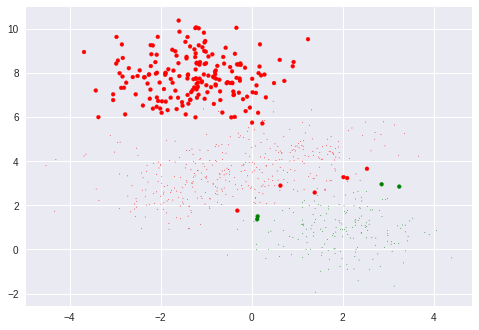

In [0]:
# plotting the prediction vs actual - from the training set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_train_binarised,cmap=my_cmap,s=15*(np.abs(Y_pred_train_binarised-Y_train))+0.2)
plt.show()

**Large dots are wrongly classified in the plot**

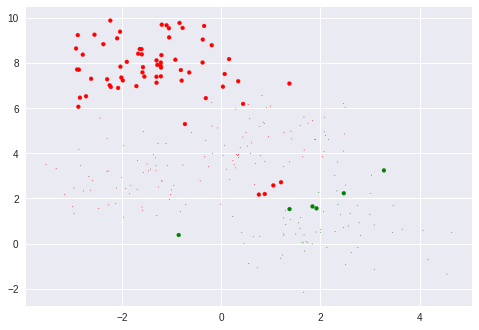

In [0]:
# plotting the prediction vs actual - from the test set
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred_test_binarised,cmap=my_cmap,s=15*(np.abs(Y_pred_test_binarised-Y_test))+0.2)
plt.show()

## Simple Neural Network with 3 Neurons

In [0]:
class FirstFFNetwork:
  # initialize all the required weigths
  def __init__(self):
    self.w1 = np.random.rand()
    self.w2 = np.random.rand()
    self.w3 = np.random.rand()
    self.w4 = np.random.rand()
    self.w5 = np.random.rand()
    self.w6 = np.random.rand()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    
    
  # function for sigmoid
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  # function for forward pass
  def forward_pass(self,x):
    self.x1,self.x2 = x
    
    # 1st Layer
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # 2nd Layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
  
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h1
    self.dw6 = (self.h3-y) * self.h2
    self.db3 = (self.h3-y)
    
    self.dw1 = (self.h3-y) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(Y,Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

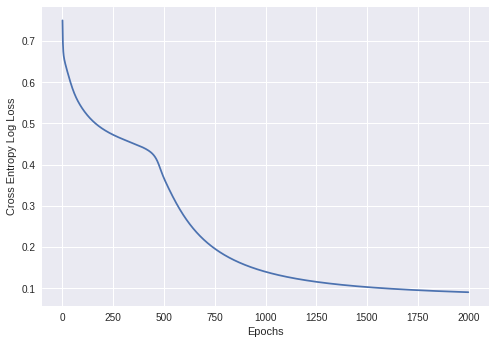

In [13]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=0.5, display_loss=True)

In [0]:
Y_pred_train = ffn.predict(X_train)
Y_pred_train_binarised = (Y_pred_train >= 0.5).astype(int).ravel()
Y_pred_test = ffn.predict(X_test)
Y_pred_test_binarised = (Y_pred_test >= 0.5).astype(int).ravel()

accuracy_train = accuracy_score(Y_pred_train_binarised,Y_train)
accuracy_test = accuracy_score(Y_pred_test_binarised,Y_test)

print('Accuracy score on train data: ',round(accuracy_train,2))
print('Accuracy score on test data: ',round(accuracy_test,2))

Accuracy score on train data:  0.98
Accuracy score on test data:  0.94


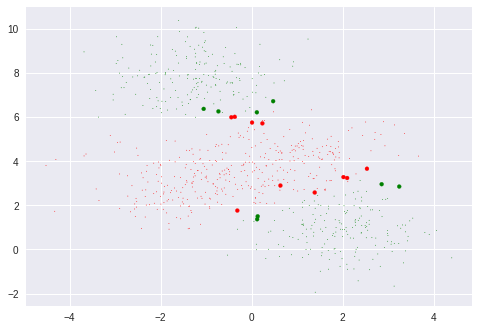

In [0]:
# plotting the prediction vs actual - from the training set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_train_binarised,cmap=my_cmap,s=15*(np.abs(Y_pred_train_binarised-Y_train))+0.2)
plt.show()

## Generic Neural Network

In [0]:
class FFSNNetwork:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

In [0]:
ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs=1000, learning_rate=.001, display_loss=True)

In [0]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

## Multiclass classification

In [0]:
class FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()